In [113]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline


In [114]:
# read in all the words
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [115]:
len(words)

32033

In [116]:
# build the vocabulary of characters and mapps to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
stoi
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [ ]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words:

    print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        #print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix] # crop and append


X = torch.tensor(X)
Y = torch.tensor(Y)

emma
olivia
ava
isabella
sophia
charlotte
mia
amelia
harper
evelyn
abigail
emily
elizabeth
mila
ella
avery
sofia
camila
aria
scarlett
victoria
madison
luna
grace
chloe
penelope
layla
riley
zoey
nora
lily
eleanor
hannah
lillian
addison
aubrey
ellie
stella
natalie
zoe
leah
hazel
violet
aurora
savannah
audrey
brooklyn
bella
claire
skylar
lucy
paisley
everly
anna
caroline
nova
genesis
emilia
kennedy
samantha
maya
willow
kinsley
naomi
aaliyah
elena
sarah
ariana
allison
gabriella
alice
madelyn
cora
ruby
eva
serenity
autumn
adeline
hailey
gianna
valentina
isla
eliana
quinn
nevaeh
ivy
sadie
piper
lydia
alexa
josephine
emery
julia
delilah
arianna
vivian
kaylee
sophie
brielle
madeline
peyton
rylee
clara
hadley
melanie
mackenzie
reagan
adalynn
liliana
aubree
jade
katherine
isabelle
natalia
raelynn
maria
athena
ximena
arya
leilani
taylor
faith
rose
kylie
alexandra
mary
margaret
lyla
ashley
amaya
eliza
brianna
bailey
andrea
khloe
jasmine
melody
iris
isabel
norah
annabelle
valeria
emerson
adalyn
ryl

In [117]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):
    X, Y = [], []
    for w in words:

        #print(w)
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            #print(''.join(itos[i] for i in context), '----->', itos[ix])
            context = context[1:] + [ix] # crop and append

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [118]:
len(words[n2:])

3204

In [ ]:
C = torch.randn((27, 2))

In [20]:
Xtr.shape, Xtr.dtype, Ytr.shape, Ytr.dtype

(torch.Size([182625, 3]), torch.int64, torch.Size([182625]), torch.int64)

In [15]:
C = torch.rand((27, 2)) # each of the 27 characters will have a 2D embedding

In [ ]:
C[5] # integer indexing into the look up table C, this is faster

In [ ]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C # 5th dimension is one, shape is 27
# or think of it as the first layer of the neural net (with no non-linearity), with a weight matrix of C

tensor([0.5014, 0.8419])

In [30]:
# python lets you index by lists or tensor of integers with repeated rows too
C[torch.tensor([5,6,7,7,7,7])]
C[X]

tensor([[[0.5125, 0.3615],
         [0.5125, 0.3615],
         [0.5125, 0.3615]],

        [[0.5125, 0.3615],
         [0.5125, 0.3615],
         [0.5014, 0.8419]],

        [[0.5125, 0.3615],
         [0.5014, 0.8419],
         [0.2725, 0.9738]],

        [[0.5014, 0.8419],
         [0.2725, 0.9738],
         [0.2725, 0.9738]],

        [[0.2725, 0.9738],
         [0.2725, 0.9738],
         [0.4600, 0.4921]],

        [[0.5125, 0.3615],
         [0.5125, 0.3615],
         [0.5125, 0.3615]],

        [[0.5125, 0.3615],
         [0.5125, 0.3615],
         [0.0930, 0.3758]],

        [[0.5125, 0.3615],
         [0.0930, 0.3758],
         [0.0042, 0.5934]],

        [[0.0930, 0.3758],
         [0.0042, 0.5934],
         [0.7667, 0.9129]],

        [[0.0042, 0.5934],
         [0.7667, 0.9129],
         [0.0891, 0.6568]],

        [[0.7667, 0.9129],
         [0.0891, 0.6568],
         [0.7667, 0.9129]],

        [[0.0891, 0.6568],
         [0.7667, 0.9129],
         [0.4600, 0.4921]],

    

In [31]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [ ]:
W1 = torch.randn((6, 100)) # 6 neurons in the first layer, 2 dimensional embeddings * 3 of them for each character we want to consider in the context window
b1 = torch.randn(100)

In [ ]:
#emb @ W1 + b1 won't work, need to transform 32x3x2 into 6x100

RuntimeError: mat1 and mat2 shapes cannot be multiplied (96x2 and 6x100)

In [116]:
torch.cat((emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]), 1).shape # list of tensors, concatenate on dimension 1

torch.Size([228146, 6])

In [117]:
# above doesn't scale if we change our context window because we are specifying manually
# escape with torch.unbind
torch.cat(torch.unbind(emb, 1), 1)[3]

tensor([-0.3783,  0.2218, -0.9597, -0.5303, -0.9597, -0.5303],
       grad_fn=<SelectBackward0>)

In [48]:
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [118]:
a.view(3,3,2) # we can modify our view of the numbers contained in a tensor to suit whatever shape we want, more efficient likely because data isn't actually changing form

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [119]:
a.storage() # numbers as a one dimensional vector, numbers as stores in actual memory
# can change it into an n-dimensional tensor
# storage is identical, internals are being changes, storage-offset, stride, and shape so it's seen differently

 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [120]:
emb.view(32, 6) == torch.cat(torch.unbind(emb, 1), 1)
# above right term is inefficient

RuntimeError: shape '[32, 6]' is invalid for input of size 1368876

In [121]:
h = torch.tanh(emb.view(-1, 6) @W1 + b1) # -1 will derive the value in order for matrix mul must be correct
h.shape

RuntimeError: Tensor for argument #1 'mat1' is on CPU, but expected it to be on GPU (while checking arguments for mm)

In [122]:
W2 = torch.rand((100, 27))
b2 = torch.rand(27)

In [61]:
logits = h @ W2 + b2

In [62]:
logits.shape

torch.Size([32, 27])

In [65]:
counts = logits.exp()

In [66]:
probs = counts / counts.sum(1, keepdims=True)

In [67]:
probs.shape

torch.Size([32, 27])

In [68]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [73]:
loss = -probs[torch.arange(32), Y].log().mean()
loss

tensor(5.7409)

In [ ]:
embedding_vector_dimension = 10
num_neurons_hidden_layer = 200
num_inouts = 27
g = torch.Generator().manual_seed(214748647)
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g) # can scale up neurons in hidden layer from 100 to 300
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [136]:
sum(p.nelement() for p in parameters) # number of parameters in total

11897

In [137]:
for p in parameters:
    p.requires_grad = True

In [138]:
lri = []
lossi = []
stepi = []

In [39]:
lre = torch.linspace(-3, 0, 1000) # between 0.001 and 1
lrs = 10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [ ]:
for i in range(200000):

    #minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32, ))  # better to evaluate on an approximate gradient and take many more steps


    emb = C[Xtr[ix]] # (32, 3, 2) - for each of the 32 examples, which contain a content window of 3 characters, with each character having a 2-dimensional vector
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100) -> taking each of those values, transforming with view into a 32x6 matrix, then running through neuron with values of W1 and b1, then applying activation function of tanh
    logits = h @ W2 + b2 # (32, 27) 
    #counts = logits.exp()
    #prob = counts / counts.sum(1, keepdims=True) # above 2 lines are your standard softmax to get probabilities of each neuron firing
    #loss = -prob[torch.arange(32), Y].log().mean()
    loss = F.cross_entropy(logits, Ytr[ix]) # preferred because we can used fused kernels which are more efficient to backpropagate through (i.e. tanh)
    # also much better numerically behaved, can't pass very large logits through the expression, e**100 is a very large number! instead we can add/subtract an offset and still get the same value, negative numbers are ok, positive numbers aren't. so we take a look at the max and subtract
    
    # print(f'Epoch: {i}', loss.item())
    
    # backward pass 
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    # lr = lrs[i]
    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad # how do you know the appropriate learning rate?

    # track stats
    # lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())
    

In [140]:
print(loss.item())

2.6588339805603027


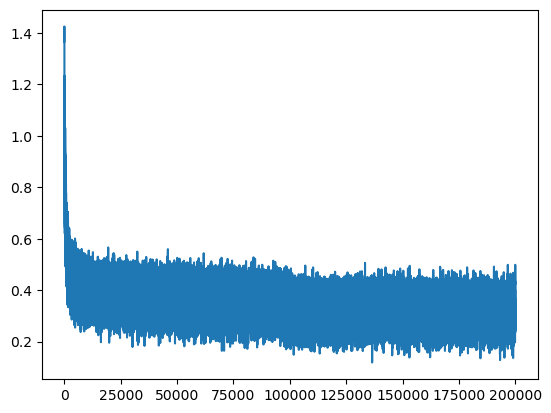

In [141]:
plt.plot(stepi, lossi)
plt.show()
# learning rate eventually gets too high that it causes loss to increase over time
# empirically, this ends up being around 10**(-1)
# thickness happens because of mini-batches

In [ ]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

# neural network loss of 2.3 is better than 2.45 of bigram model
# but as network gets bigger, easier to overfit, all the model is doing is memorizing training dataset verbatim
# data needs to be withheld, split data into 3
# training, dev/validation split, test split
# 80/10/10
# 80 used to optimize parameters of model
# dev used for dev of hyperparameters, learning rate, embedding, strength of regularization
# test used to evaluate performance of model - used sparingly, each time used, also starting to train on test set

# if there is little difference in loss between xtrain and xdev, then we are underfitting and can scale up performance of network with more parameters, we have a tiny network

tensor(2.1204, grad_fn=<NllLossBackward0>)

In [147]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss


tensor(2.1565, grad_fn=<NllLossBackward0>)

In [ ]:
emb = C[Xte]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Yte)
loss

tensor(2.1532, grad_fn=<NllLossBackward0>)

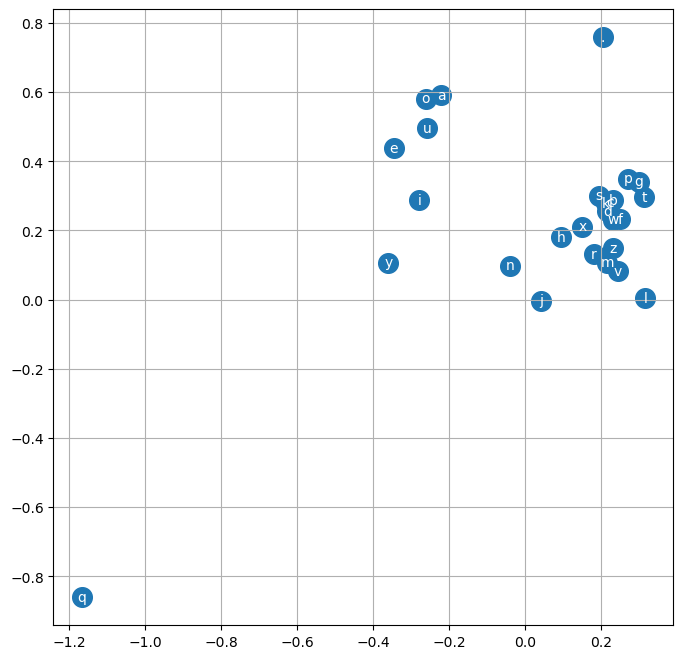

In [67]:
plt.figure(figsize=(8,8))
C = C.cpu()
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')
plt.show()

In [100]:
logits.max(1)

torch.return_types.max(
values=tensor([10.7023, 15.8265, 16.3855, 19.6013, 18.5759, 10.7023, 19.5178, 15.2144,
        17.6157, 16.3362, 16.7643, 16.8379, 10.7023, 17.0755, 18.1210, 19.8519,
        10.7023, 16.3358, 17.4491, 20.0327, 14.4147, 11.7695, 16.5641, 15.6184,
        17.7859, 10.7023, 17.6149, 16.6938, 16.9313, 18.4348, 18.5519, 14.9796],
       grad_fn=<MaxBackward0>),
indices=tensor([19, 13, 13,  1,  0, 19, 12,  9, 22,  9,  1,  0, 19, 22,  1,  0, 19, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0]))

In [101]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [ ]:
# loss isn't zero because first ... has multiple correct values

In [143]:
torch.randint(0, X.shape[0], (32, ))

tensor([131778, 227109,  44108,  52599, 193010,  27080,  46459,  73429,  84485,
        156429, 215458,  71747,  71557,  98280,  52859, 112765,  20449, 122219,
         51524,  53890,   6870,   3199,  97344, 149314,  28005,  35999, 100453,
         32917,   9007, 156982, 176982, 203161])

In [149]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 1)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initializer with all ...
    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
    
    print(''.join(itos[i] for i in out))

xovmaevey.
zhailee.
ana.
bane.
kmy.
zanus.
reislin.
judi.
admadhaiser.
edin.
roon.
kel.
ken.
maashiyan.
subrick.
ramiiah.
brin.
khylanilapingh.
karita.
kaelinahga.
